# E-Commerce Product --- Recommender System

Rekomendasi ini dibuat berdasarkan <b>content-based filtering</b> menggunakan <b>Cosine Similarity dan Jaccard Similarity.</b>  Ilustrasi content-based filtering dapat dilihat di bawah.

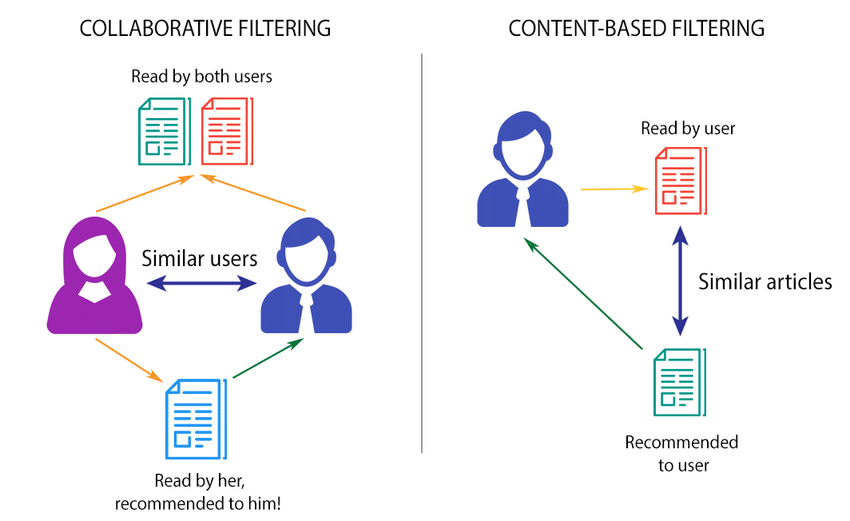

In [1]:
from IPython.display import Image
Image(filename='1.png') 

Source: https://www.themarketingtechnologist.co/building-a-recommendation-engine-for-geeksetting-up-the-prerequisites-13/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import jaccard_similarity_score
import string
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import re

import warnings
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv('sample-data.csv')
df.shape

(500, 2)

In [4]:
df.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [5]:
df.drop('id', inplace = True, axis = 1)

In [6]:
df.head()

,description
0,Active classic boxers - There's a reason why o...
1,Active sport boxer briefs - Skinning up Glory ...
2,Active sport briefs - These superbreathable no...
3,"Alpine guide pants - Skin in, climb ice, switc..."
4,"Alpine wind jkt - On high ridges, steep ice an..."


# Preprocessing

In [7]:
from random import randint, seed

seed(101)
df.loc[randint(1, len(df))]['description']

'Active boy shorts - We\'ve worn these versatile, feminine boy shorts as on-the-fly bathing suit bottoms, to Bikram yoga class, as sleepwear - their functionality is limitless. Low-rise Active Boy Shorts are tube-constructed to eliminate chafing side seams, and their soft, technical fabric breathes and wicks moisture to keep you comfortable and dry. We\'ve shortened the flat waistband in front for a fit that won\'t roll or bind; stretchy shaped openings at legs are newly redesigned with less fabric to minimize bunching. Solids and prints: 4.6-oz 93% nylon/7% spandex.<br><br><b>Details:</b><ul> <li>"Ultrasoft, lightweight fabric with stretch and moisture management"</li> <li>Seamless construction</li> <li>"Waistband and shaped leg openings lie flat, won\'t roll or bind for well deserved comfort and mobility"</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% nylon/7% spandex, with moisture-wicking performance"<br><br><b>Weight: </b>(31 g 1.1 oz)<br><br>Made in Israel.'

> Kalau dilihat dari sample random di atas, data ini banyak tag html yang harus dibersihkan.

In [8]:
def clean(txt):
    txt = re.sub('https?:\/\/\S+', '', txt) 
    cl = re.compile('<.*?>')
    txt = re.sub(cl, '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt) 
    txt = re.sub(r'(\w)\1+', r'\1', txt)
    txt = re.sub('[%s]' % re.escape(string.punctuation), '', txt)
    txt = str(txt).lower()
    return txt

def re_stopword(x):
    return [y for y in x if y not in stopwords.words('english')] 

df['description'] = df['description'].apply(clean)

# EDA

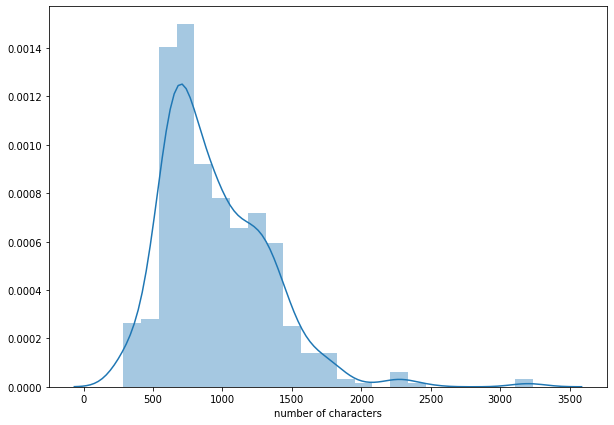

In [9]:
df['number of characters'] = df['description'].apply(lambda x : len(x))

plt.figure(figsize = (10, 7))
sns.distplot(df['number of characters'])

Jumlah karakter tidak terlalu banyak, mengingat fitur ini hanya berupa deskripsi produk. 

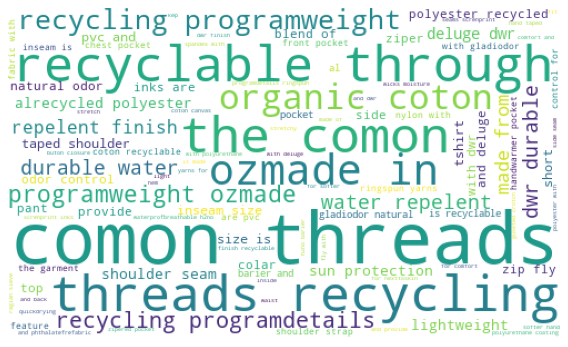

In [10]:
allWords = ''.join(i for i in df['description'])
wordsCloud = WordCloud(max_font_size=100, max_words=100, width=500, height=300, background_color = 'white').generate(allWords)

plt.figure(figsize=(8,8))
plt.imshow(wordsCloud)
plt.axis("off")
plt.tight_layout()
plt.show()

Produk-produk di dataset ini kebanyakan produk untuk pakaian luar. Itu kenapa, kata-kata yang bermunculan adalah kata-kata yang berhubungan dengan bahan-bahan baju dan ramah lingkungan. 

# Recommendation System

In [11]:
bow = CountVectorizer(stop_words = 'english', tokenizer = word_tokenize) #BagOfWords
bank = bow.fit_transform(df['description'])

## Cosine Similarity

Cosine similarity punya persamaannya yang sederhana, yaitu:

$$similarity = \cos(\theta) = \frac{\vec{A}\cdot \vec{B}}{\left | A \right |\left | B \right |} $$

Melihat persamaan di atas, seharusnya kita langsung mendapatkan idenya. Karena semakin kecil sudutnya (bisa dibayangkan kedekatan dua objek) semakin besar nilainya. Nilai cos hanya berada di antara -1 dan 1.

In [12]:
content = [df.loc[218]['description']]
code = bow.transform(content)

cos = cosine_distances(code, bank)
idx = pd.Series(cos[0]).sort_values()[1:11].index

In [13]:
df.iloc[idx]

,description,number of characters
290,print adour btm adours have a slightly scoped...,291
239,print bayone btm the lowrise bayone botoms ha...,325
260,print paries btm styled like a boy short our ...,426
254,solid suname btm stayput sunames fit straight...,294
253,solid paries btm the boyshortstyle paries bot...,413
261,print suname btm stayput sunames fit straight...,294
219,solid betina btm our fulest coverage botoms t...,338
7,print banded betina btm our fulest coverage b...,333
220,solid bibiana 1 piece the sporty bibiana onep...,380
240,print bibiana tankini the bibiana tankinis ra...,373


## Jaccard Similarity

Jaccard juga sama dengan cosine similarity, dia juga punya persamaan yang sederhana: 

$$J(A,B) = \frac{\left | A\cap B \right |}{\left | A\cup B \right |}$$

Seharusnya dari persamaan di atas, kita langsung mendapatkan idenya. Semakin besar irisannya, artinya semakin banyak juga kesamaannya. Jaccard indeks hanya berada di antara 0 dan 1.

In [14]:
J = []

for i in range(len(bank.toarray())):
    J.append(jaccard_similarity_score(code.toarray()[0], bank.toarray()[i]))
 
ind = pd.Series(J).sort_values(ascending = False)[1:11].index

In [15]:
df.iloc[ind]

,description,number of characters
290,print adour btm adours have a slightly scoped...,291
254,solid suname btm stayput sunames fit straight...,294
239,print bayone btm the lowrise bayone botoms ha...,325
261,print suname btm stayput sunames fit straight...,294
219,solid betina btm our fulest coverage botoms t...,338
7,print banded betina btm our fulest coverage b...,333
253,solid paries btm the boyshortstyle paries bot...,413
260,print paries btm styled like a boy short our ...,426
220,solid bibiana 1 piece the sporty bibiana onep...,380
221,solid bibiana top the athletic bibiana tops r...,474


Menarik, melihat adanya irisan terhadap rekomendasi yang menggunakan Jaccard dan Cosine Similarity.

# Sanity Check

In [16]:
df.loc[218]['description']

'solid adour btm  adours feature a scoped lowrise front lined and medium coverage in back our improved fabric blend is made of 82 nylon18 spandexdetails medium coverage lined front slightly scoping front low rise improved fabricfabric 56oz 82 nylon18 spandexweight 43 g 15 ozmade in usa'

## Cosine Similarity

In [17]:
df.loc[290]['description']

'print adour btm  adours have a slightly scoped lowrise front lined and medium coverage in back our improved fabric blend is made of 82 nylon18 spandexdetails medium coverage lined front slightly scoping front low rise improved fabricfabric 56oz 82 nylon18 spandexweight 43 g 15 ozmade in usa'

In [18]:
df.loc[239]['description']

'print bayone btm  the lowrise bayone botoms have adjustable side ties and minimal seat coverage  les than al of our other styles lined front made from a blend of 82 nylon18 spandexdetails least coverage lined front adjustable sidetie closures low rise improved fabricfabric 56oz 82 nylon18 spandexweight 43 g 15 ozmade in usa'

In [19]:
df.loc[260]['description']

'print paries btm  styled like a boy short our paries botoms fit low and straight acros the hips with medium coverage in front and ful coverage in back lined front made from our improved fabric blend of 82 nylon18 spandexdetails boyshort style lined front fits low and straight acros hips updated waist styling medium coverage in front ful back coverage improved fabricfabric 56oz 82 nylon18 spandexweight 54 g 19 ozmade in usa'

## Jaccard Similarity

In [20]:
df.loc[290]['description']

'print adour btm  adours have a slightly scoped lowrise front lined and medium coverage in back our improved fabric blend is made of 82 nylon18 spandexdetails medium coverage lined front slightly scoping front low rise improved fabricfabric 56oz 82 nylon18 spandexweight 43 g 15 ozmade in usa'

In [21]:
df.loc[254]['description']

'solid suname btm  stayput sunames fit straight acros the hips with ful coverage in back lined front made from a formfiting blend of 82 nylon18 spandexdetails ful coverage lined front fits straight acros hips regular rise improved fabricfabric 56oz 82 nylon18 spandexweight 43 g 15 ozmade in usa'

In [22]:
df.loc[239]['description']

'print bayone btm  the lowrise bayone botoms have adjustable side ties and minimal seat coverage  les than al of our other styles lined front made from a blend of 82 nylon18 spandexdetails least coverage lined front adjustable sidetie closures low rise improved fabricfabric 56oz 82 nylon18 spandexweight 43 g 15 ozmade in usa'

Pada sistem rekomendasi memang tidak ada sistem yang lebih baik atau lebih buruk. Namun kalau dilihat dari hasil antara dua pendekatan di atas, mereka memiliki hasil yang bersinggungan dan rekomendasi-rekomendasi yang diberikan mirip dengan produk yang dipilih sebelumnya. 